<a href="https://colab.research.google.com/github/CyberSelva29/Standard_Chartered_Hack/blob/main/Cheque_element_ident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Udj0ZYovcbyzaTAQ3VKg")
project = rf.workspace("chequeautodataentry").project("cheque_element_categorization")
version = project.version(1)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cheque_element_categorization-1 in yolov8-obb:: 100%|██████████| 544/544 [00:00<00:00, 3787.46it/s]


In [ ]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-obb.pt")

results = model.train(data=f"{dataset.location}/data.yaml", epochs=40, imgsz=[1500,640])

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/cheque_element_categorization-1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=[1500, 640], save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /content/cheque_element_categorization-1/train/labels.cache... 234 images, 0 backgrounds, 0 corrupt: 100%|██████████| 234/234 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/cheque_element_categorization-1/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]


Plotting labels to runs/obb/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 1504 train, 1504 val
Using 2 dataloader workers
Logging results to runs/obb/train4
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      13.7G      3.306      6.328       4.02        313       1504: 100%|██████████| 15/15 [00:46<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         22        320     0.0125     0.0848     0.0167     0.0034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      12.5G      2.254      3.945      3.339        287       1504: 100%|██████████| 15/15 [00:22<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all         22        320      0.533      0.134     0.0882     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      11.9G       1.84       2.91      3.226        298       1504: 100%|██████████| 15/15 [00:22<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         22        320      0.621      0.378      0.319     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      11.9G      1.666      2.179      3.161        328       1504: 100%|██████████| 15/15 [00:22<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         22        320      0.565      0.532      0.467      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      11.9G       1.59      1.721      3.041        307       1504: 100%|██████████| 15/15 [00:20<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         22        320      0.532      0.637      0.569      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      11.8G      1.499      1.441      2.945        347       1504: 100%|██████████| 15/15 [00:22<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         22        320      0.621      0.649      0.599       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      11.8G      1.431       1.33      2.924        314       1504: 100%|██████████| 15/15 [00:22<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         22        320      0.702      0.766        0.7      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      11.9G      1.396      1.182      2.904        337       1504: 100%|██████████| 15/15 [00:21<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         22        320      0.686      0.717       0.62      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      11.8G      1.382      1.139      2.833        315       1504: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         22        320      0.723      0.749      0.651      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      11.8G      1.336      1.104      2.813        300       1504: 100%|██████████| 15/15 [00:23<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         22        320      0.716      0.758      0.642      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      11.8G      1.293      1.048      2.814        292       1504: 100%|██████████| 15/15 [00:22<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         22        320      0.762      0.792      0.722      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      11.9G      1.294      1.012      2.789        323       1504: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         22        320      0.667      0.687      0.582      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      11.9G      1.268     0.9919      2.772        220       1504: 100%|██████████| 15/15 [00:25<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         22        320      0.669      0.698       0.59      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      11.8G      1.237     0.9738      2.773        243       1504: 100%|██████████| 15/15 [00:24<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         22        320      0.767      0.805      0.733      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      11.8G      1.256     0.9412      2.663        269       1504: 100%|██████████| 15/15 [00:22<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         22        320       0.55      0.578      0.439       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      11.8G      1.204     0.9256      2.728        358       1504: 100%|██████████| 15/15 [00:23<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]


                   all         22        320      0.725      0.757      0.672      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      11.8G      1.171     0.8911      2.703        311       1504: 100%|██████████| 15/15 [00:22<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         22        320      0.585      0.612      0.488      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      11.9G      1.181     0.8941       2.69        302       1504: 100%|██████████| 15/15 [00:23<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         22        320      0.684      0.711      0.621      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      11.8G       1.18     0.9067      2.703        270       1504: 100%|██████████| 15/15 [00:23<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         22        320      0.563      0.596      0.452      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      11.8G      1.165     0.8908      2.702        246       1504: 100%|██████████| 15/15 [00:25<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         22        320      0.648      0.669      0.552      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      11.9G      1.133     0.8714      2.676        317       1504: 100%|██████████| 15/15 [00:22<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         22        320      0.578      0.606       0.47      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      11.9G      1.115     0.8436      2.638        293       1504: 100%|██████████| 15/15 [00:23<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         22        320      0.588      0.605      0.472      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      11.8G      1.118     0.8404      2.679        339       1504: 100%|██████████| 15/15 [00:23<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         22        320      0.574      0.596      0.462      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      11.9G      1.128     0.8513      2.655        261       1504: 100%|██████████| 15/15 [00:23<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         22        320      0.637      0.651       0.55      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      11.8G      1.083     0.8199      2.677        328       1504: 100%|██████████| 15/15 [00:22<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         22        320      0.524      0.548      0.413      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      11.9G      1.111      0.846      2.678        230       1504: 100%|██████████| 15/15 [00:24<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         22        320      0.632      0.642      0.518      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      11.9G      1.116     0.8333      2.651        238       1504: 100%|██████████| 15/15 [00:23<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         22        320       0.53      0.558      0.427      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      11.8G      1.083      0.826      2.654        301       1504: 100%|██████████| 15/15 [00:23<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         22        320      0.569      0.589      0.466      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      11.8G      1.094     0.8057      2.641        284       1504: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         22        320      0.585      0.605      0.467      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      11.7G      1.069     0.7972       2.64        312       1504: 100%|██████████| 15/15 [00:24<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         22        320      0.498      0.511      0.379      0.104


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40        14G      1.113     0.8347      2.699        143       1504: 100%|██████████| 15/15 [00:39<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         22        320      0.617      0.638      0.504      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40        12G      1.048     0.7743      2.738        147       1504: 100%|██████████| 15/15 [00:22<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         22        320      0.585      0.608      0.477      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40        12G      1.041     0.7598      2.712        147       1504: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         22        320      0.563      0.586      0.457      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      11.9G      1.001     0.7271      2.707        145       1504: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         22        320      0.517      0.532      0.403      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      11.9G      1.009     0.7246      2.708        148       1504: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         22        320      0.512      0.533      0.402      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40        12G     0.9936     0.7093        2.7        141       1504: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         22        320       0.51      0.526      0.395      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40        12G     0.9903     0.7019      2.691        146       1504: 100%|██████████| 15/15 [00:20<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         22        320      0.531      0.545      0.427      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40        12G     0.9824      0.707      2.666        143       1504: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         22        320      0.519      0.536      0.405      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40        12G      0.984      0.698      2.694        135       1504: 100%|██████████| 15/15 [00:20<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         22        320      0.529      0.547      0.415      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      11.9G     0.9718     0.7003      2.694        147       1504: 100%|██████████| 15/15 [00:20<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         22        320      0.503      0.525      0.389      0.103



40 epochs completed in 0.294 hours.
Optimizer stripped from runs/obb/train4/weights/last.pt, 6.7MB
Optimizer stripped from runs/obb/train4/weights/best.pt, 6.7MB

Validating runs/obb/train4/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3080144 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


                   all         22        320      0.764      0.802      0.728      0.158
            acc_number         22         21      0.837      0.905      0.847      0.158
        amount_numbers         22         22      0.909      0.903      0.903      0.165
          amount_words         22         22      0.826      0.955      0.921      0.216
          bank_address         22         22      0.935      0.955      0.955      0.324
             bank_logo         22         22      0.762      0.773      0.662      0.136
         cheque_number         22         21      0.844      0.905      0.812       0.11
         currency_type         22         21      0.224      0.238       0.12      0.101
                  date         22         22      0.983          1      0.995      0.221
           date_format         22         22      0.998          1      0.995      0.198
             ifsc_code         22         22      0.655      0.727      0.554     0.0906
             micr_cod

/content


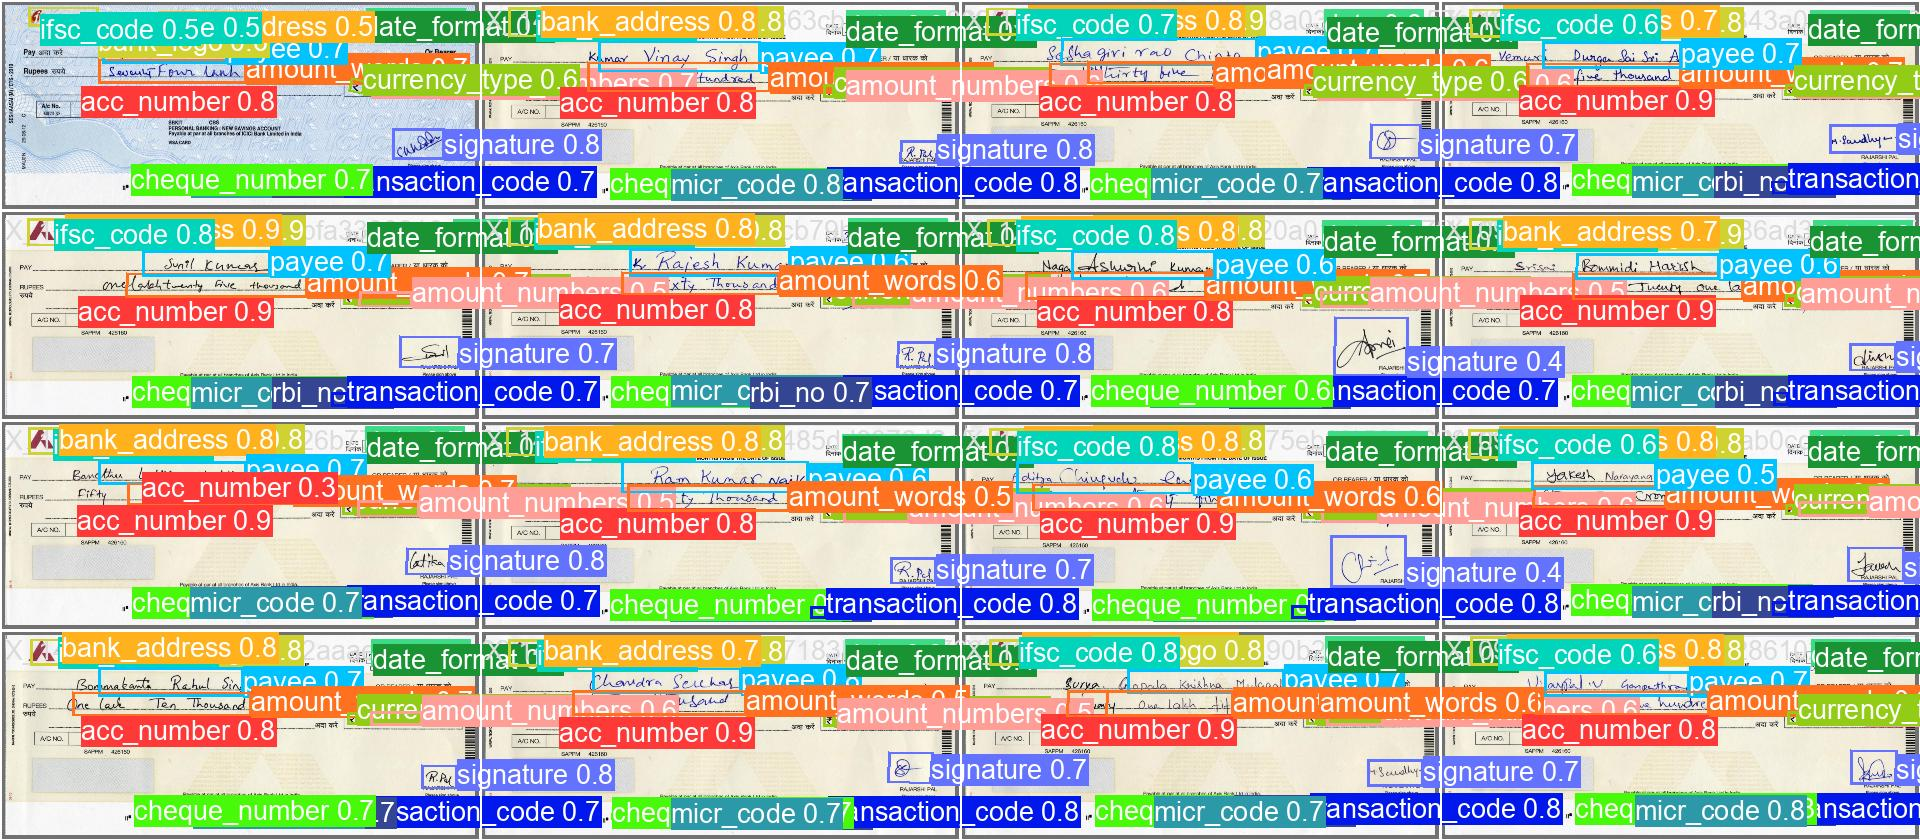

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

from IPython import display
display.clear_output()
from IPython.display import display, Image

%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train4/val_batch0_pred.jpg', width=600)